<a href="https://colab.research.google.com/github/AlvinAditiya117/PCVK25_3F_04/blob/main/Week9_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

alvin aditiya 3F 04 2341720020

**Tugas praktikum**

In [ ]:
!sudo apt install tesseract-ocr -y
!pip install pytesseract



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


**Import beberapa library**

In [ ]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import cv2 as cv

Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan
threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di
atas.

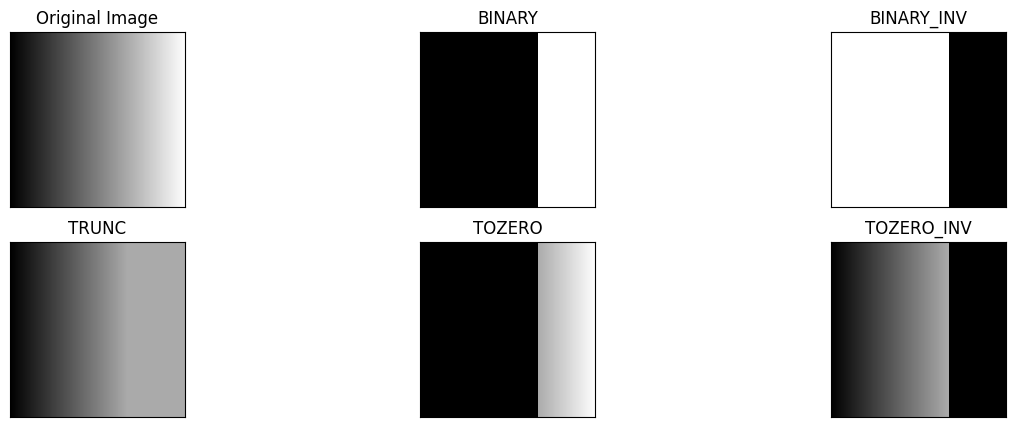

In [ ]:
filename = '/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_04/grandiant.jpeg'

img = cv.imread(filename)

thresh1 = img.copy()
thresh2 = img.copy()
thresh3 = img.copy()
thresh4 = img.copy()
thresh5 = img.copy()
thresh = 170  # nilai threshold

# 1. Binary Threshold
thresh1[img > thresh] = 255
thresh1[img <= thresh] = 0

# 2. Binary Threshold Inverse
thresh2 = 255 - thresh1

# 3. Threshold Truncate
thresh3[img > thresh] = thresh

# 4. Threshold Tozero
thresh4[img <= thresh] = 0

# 5. Threshold Tozero Inverse
thresh5[img > thresh] = 0

# Tampilkan hasil
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(15, 5))
for i in range(len(images)):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray', interpolation='nearest')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold
saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image
ktp Riyanto.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

167


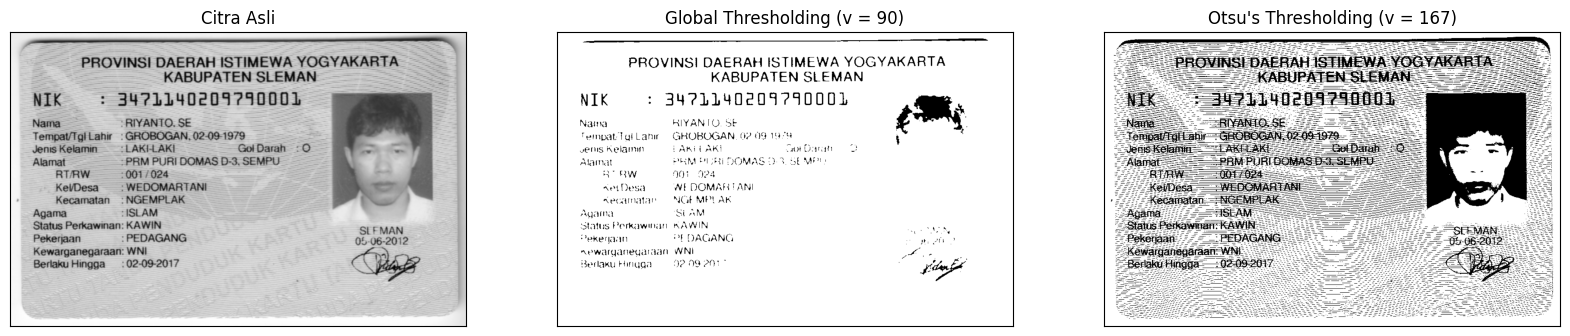

In [ ]:
filename = ('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_04/ktp.png')
img = cv.imread(filename, 0)
blur = cv.GaussianBlur(img, (5,5), 0)

def otsu(gray):
    pixel_number = gray.shape[0] * gray.shape[1]
    mean_weight = 1.0 / pixel_number
    his, bins = np.histogram(gray, np.arange(0,257))
    final_thresh = -1
    final_value = -1
    intensity_arr = np.arange(256)

    # Loop untuk setiap nilai threshold
    for t in bins[1:-1]:  # This goes from 1 to 254 uint8 range (Pretty sure won't be those values)
        pcb = np.sum(his[:t])
        pcf = np.sum(his[t:])
        Wb = pcb * mean_weight
        Wf = pcf * mean_weight
        mub = np.sum(intensity_arr[:t] * his[:t]) / float(pcb)
        muf = np.sum(intensity_arr[t:] * his[t:]) / float(pcf)
        # print(mub, muf)
        value = Wb * Wf * (mub - muf) ** 2
        if value > final_value:
            final_thresh = t
            final_value = value

    final_img = gray.copy()
    print(final_thresh)
    final_img[gray > final_thresh] = 255
    final_img[gray < final_thresh] = 0
    return final_img, final_thresh

otsu_biner, otsu_thresh = otsu(img)
x = ("Otsu's Thresholding (v = ")+str(otsu_thresh)+")"
ret, th1 = cv.threshold(blur, 90, 255, cv.THRESH_BINARY)
# ret,th2 = cv.threshold(blur,thresh,255,cv.THRESH_BINARY)
titles = ['Citra Asli', 'Global Thresholding (v = 90)', x]
citra3 = [blur, th1, otsu_biner]

plt.figure(figsize=(20,15))
for i in range(len(citra3)):
    plt.subplot(1,3,i+1)
    plt.imshow(citra3[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()


Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image
saja. Gunakan image ktp Riyanto.jpg yang sudah disediakan di folder images.
Petunjuk:
a. anda dapat gunakan cv.calcHist untuk menampilkan histogram.

b. Buka link berikut https://opencv-
tutorial.readthedocs.io/en/latest/histogram/histogram.html

c. Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter
yaitu mask. Jika diset None, maka keseluruhan image akan dihitung
histogramnya. Jika kita tentukan mask, maka hanya bagian image yang
dimasking warna putih yang akan dihitung histogramnya (dari contoh
dibawah dinamakan dengan Citra Segment).

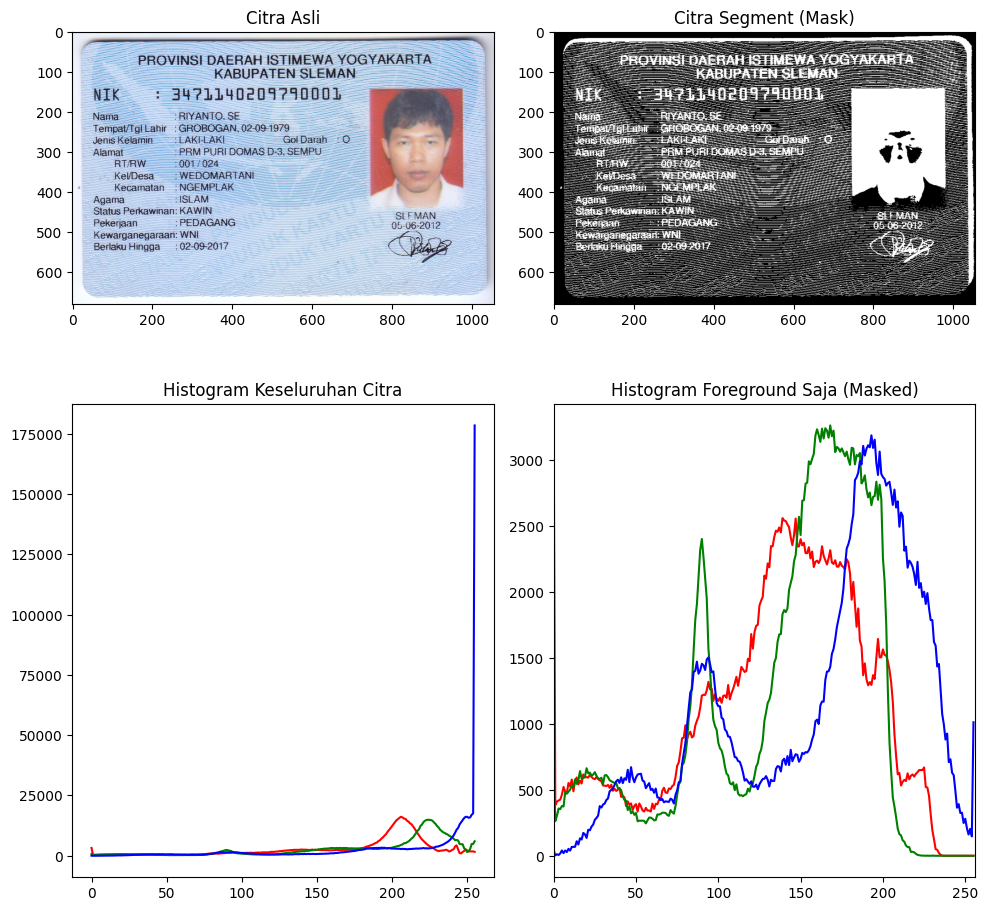

In [ ]:
filename = '/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_04/ktp.png'
img = cv.imread(filename)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
ret3, mask = cv.threshold(img_gray, 200, 255, cv.THRESH_BINARY_INV)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(img)
plt.title('Citra Asli')

plt.subplot(2, 2, 2)
plt.imshow(mask, 'gray')
plt.title('Citra Segment (Mask)')

color = ('r', 'g', 'b')

plt.subplot(2, 2, 3)
for i, col in enumerate(color):
    hist0 = cv.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist0, color=col)
plt.title('Histogram Keseluruhan Citra')

plt.subplot(2, 2, 4)
for i, col in enumerate(color):
    hist1 = cv.calcHist([img], [i], mask, [256], [0, 256])
    plt.plot(hist1, color=col)
plt.title('Histogram Foreground Saja (Masked)')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

Lakukan segmentasi warna pada image " ktp Riyanto.jpg ", munculkan hanya warna
yang biru saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya
warna tertentu saja)

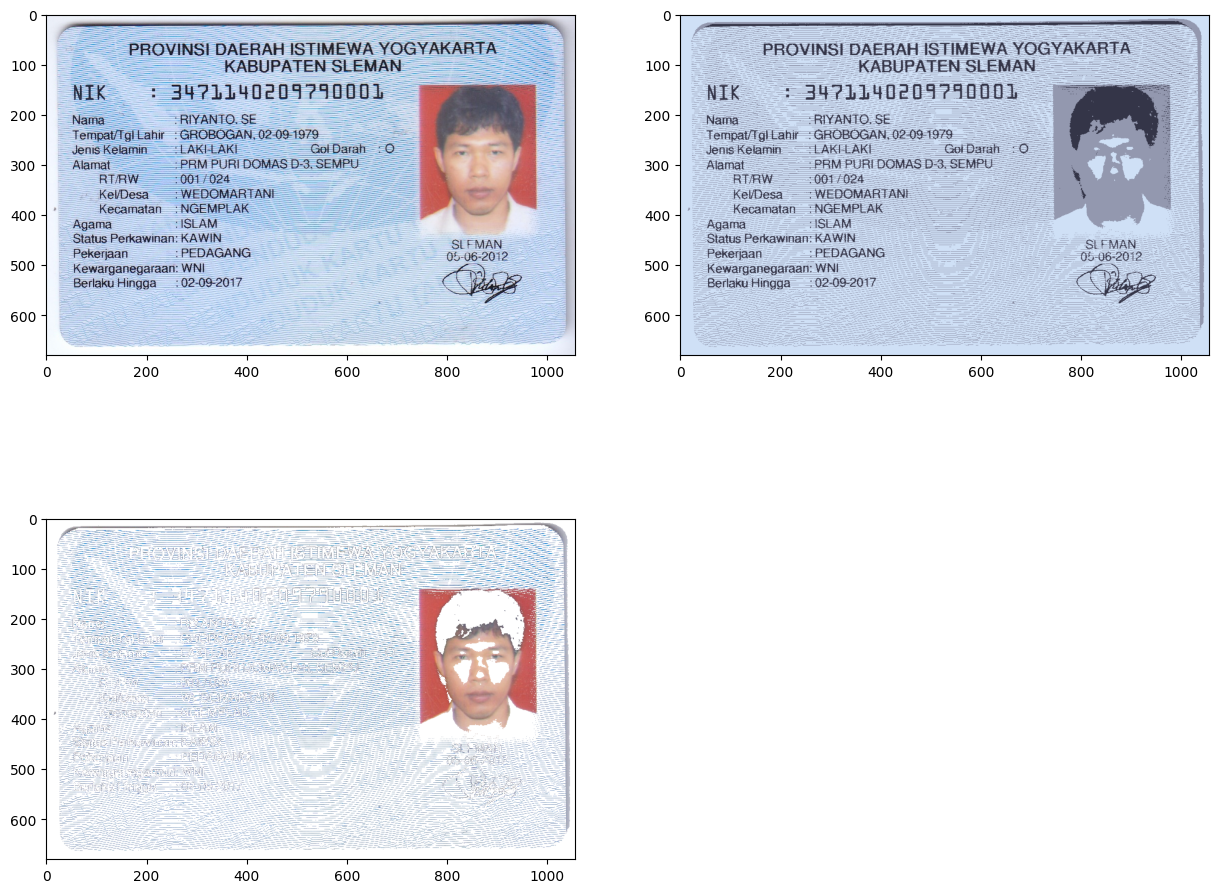

In [ ]:
filename = '/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_04/ktp.png'
img = cv.imread(filename)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 150, 0.1)
k = 3

_, labels, centers = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
labels = labels.flatten()

segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(img.shape)

masked_image = np.copy(img)
masked_image0 = masked_image.reshape((-1, 3))

masked_image0[labels != 1] = [255, 255, 255]
masked_image0 = masked_image0.reshape(img.shape)

plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 1), plt.imshow(img)
plt.subplot(2, 2, 2), plt.imshow(segmented_image)
plt.subplot(2, 2, 3), plt.imshow(masked_image0)
plt.show()


Proses konversi gambar KTP menjadi teks yang dapat mengenali tulisan.

In [ ]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-ind
0 upgraded, 1 newly installed, 0 to remove and 41 not upgraded.
Need to get 537 kB of archives.
After this operation, 1,138 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ind all 1:4.00~git30-7274cfa-1.1 [537 kB]
Fetched 537 kB in 0s (2,781 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tesseract-ocr-ind.
(Reading data

Menambahkan axis kedalam objek figure dengan method add_subplot(). kemudian
kita tunjukan objek figure kita dengan method show()

In [ ]:
def display(img,cmap='gray'):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap='gray')

Python-tesseract akan mencetak teks yang dikenali dan menyimpannya kedalam file

In [ ]:
from pytesseract import Output
img = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_04/ktp.png')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
th, threshed = cv.threshold(gray, 127, 255, cv.THRESH_TRUNC)
text1 = pytesseract.image_to_data(threshed, output_type=Output.DICT)
print(text1.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


Menambahkan kotak untuk deteksi teksi pada gambar

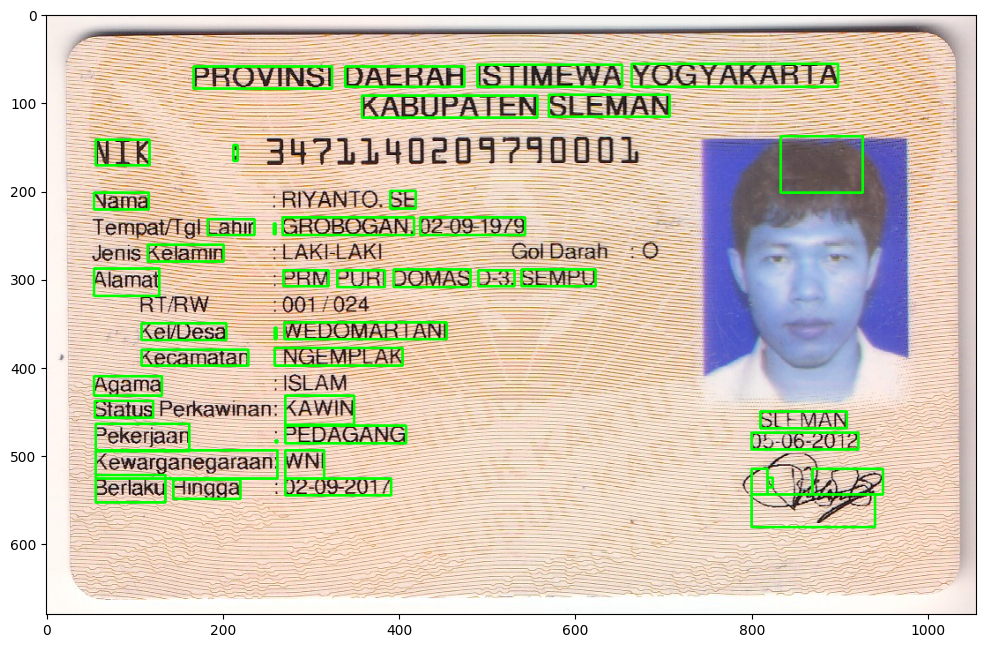

In [ ]:
n_boxes = len(text1['text'])
for i in range(n_boxes):
  if int(text1['conf'][i]) > 60:
    (x, y, w, h) = (text1['left'][i], text1['top'][i], text1['width'][i], text1['height'][i])
    img = cv.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
display(img)

Hasil pembacaan KTP Menjadi text

em

PROVINSI DAERAH ISTIMEWA YOGYAKARTA
KABUPATEN SLEMAN

 

NIK : 34711140209790001

Nama :RIYANTO. SE

Tempat/Tgl Lahir : GROBOGAN. 02-09-1979

Jenis Kelamin : LAKI-LAKI Gol Darah : 0

Alamat PRM PURI DOMAS D-3. SEMPU
RTRW 1001 1024

Kel/Desa : WEDOMARTANI!
Kecamatan : NGEMPLAK

Agama "ISLAM
Status Bean KAWIN SLEMAN
Pekerjaan : PEDAGANG 05-06-2012

Kewarganegaraan: WNI HI —
Berlaku Hingga :02-09-2017 NIA

   
 

 



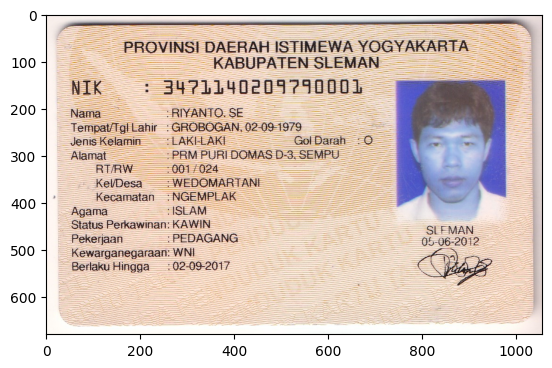

In [ ]:
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_04/ktp.png")
plt.imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)
text1 = pytesseract.image_to_data(threshed,output_type='data.frame')
text2 = pytesseract.image_to_string(threshed, lang="ind")
print(text2)
text = text1[text1.conf != -1]
lines = text.groupby('block_num')['text'].apply(list)
conf = text.groupby(['block_num'])['conf'].mean()

Tugas berikutnya adalah mengimplementasikan hasil citra yang telah diproses dengan
GLOBAL THRESHOLDING dan hasilnya diproses untuk membaca teks yang terdapat
pada KTP.

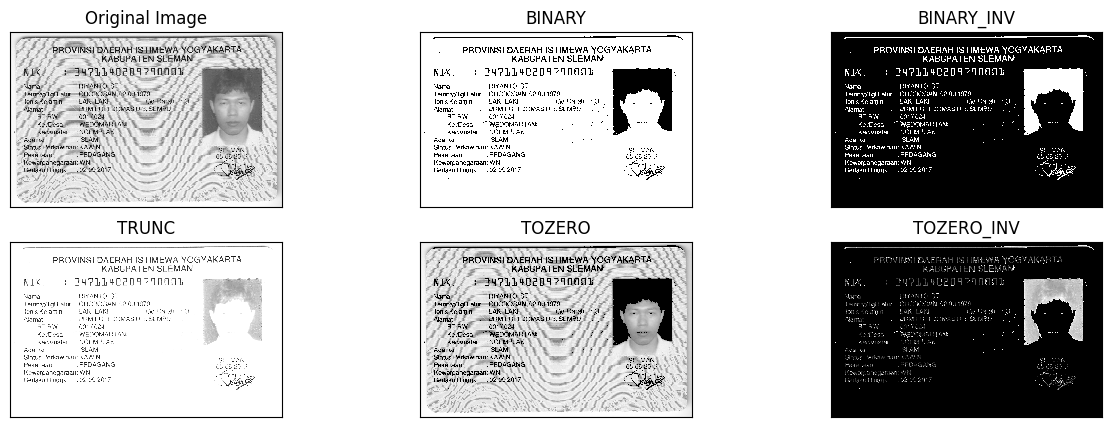

HASIL PEMBACAAN TEKS (OCR) DARI GLOBAL THRESHOLDING
aa

PROVINSI DAERAH ISTIMEWA YOGYAKARTA
KABUPATEN SLEMAN

NIK 1 34911140209790901

Nama : RIYANTO, SE

Tempat/Tgl Lahir : GROBOGAN, 02-09-1979

Jenis Kelamin # LAKI-LAKI Gel Darah: O

Alamat :PRM PURI DOMAS D-3. SEMPU
RTRW . 10017024

KelDesa- ": WEDOMARTANI
Kecamatan : NGEMPLAK

 

Agama "ISLAM
Status Perkawinan: KAWIN
Pekerjaan : PEDAGANG SEMAN,

Kewarganegaraan: WNI
Berlaku Hingga 02-09-2017 “T

Y,



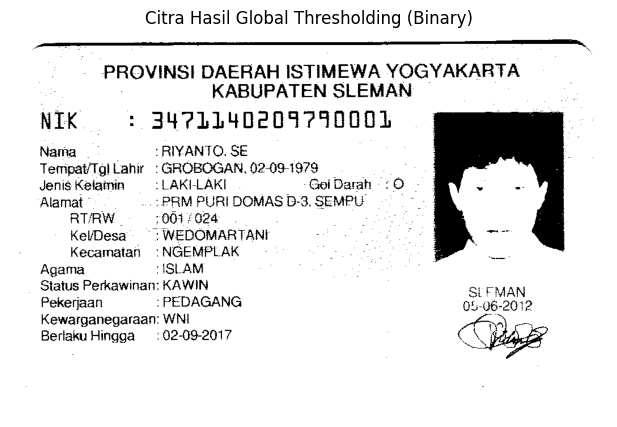

In [ ]:
filename = ('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_04/ktp.png')
img = cv.imread(filename)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# === Thresholding Methods ===
# binary
ret1, thresh_binary = cv.threshold(gray, 127, 255, cv.THRESH_BINARY)
# binary inverse
ret2, thresh_binary_inv = cv.threshold(gray, 127, 255, cv.THRESH_BINARY_INV)
# threshold truncate
ret3, thresh_trunc = cv.threshold(gray, 127, 255, cv.THRESH_TRUNC)
# threshold tozero
ret4, thresh_tozero = cv.threshold(gray, 127, 255, cv.THRESH_TOZERO)
# threshold tozero inverse
ret5, thresh_tozero_inv = cv.threshold(gray, 127, 255, cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [gray, thresh_binary, thresh_binary_inv, thresh_trunc, thresh_tozero, thresh_tozero_inv]

# Tampilkan semua hasil thresholding
plt.figure(figsize = (15,5))
for i in range(len(images)):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# Proses OCR pada hasil Global Threshold (BINARY) ===
print("="*60)
print("HASIL PEMBACAAN TEKS (OCR) DARI GLOBAL THRESHOLDING")
print("="*60)

# lakukan OCR hanya pada hasil binary
ocr_text = pytesseract.image_to_string(thresh_binary, lang='ind')

# tampilkan hasil teks yang dibaca
print(ocr_text)

# Visualisasi hasil thresholding & teks yang dibaca
plt.figure(figsize=(8,5))
plt.imshow(thresh_binary, cmap='gray')
plt.title('Citra Hasil Global Thresholding (Binary)')
plt.axis('off')
plt.show()